In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# One variable plotted 5 different ways.

For this one I plotted the price of all the listings.

In [71]:
listings = pd.read_csv('listings2.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11813186,https://www.airbnb.com/rooms/11813186,20170602102612,2017-06-02,Fab Garden Dist/Magazine Townhome/Ideal Location!,Nestled between famous St. Charles and Magazin...,All the charm of New Orleans in this historic ...,Nestled between famous St. Charles and Magazin...,none,"Location is everything! Without a doubt, the n...",(1) We have terrific neighbors. Please respect...,So easy! No car? No problem! (1) Walking...two...,"Right past the kitchen, the side door alley le...",We divide our time between our townhouse next ...,"Sorry, but... NO first-time Airbnb renters. NO...",https://a0.muscache.com/im/pictures/ed66a1dc-5...,https://a0.muscache.com/im/pictures/ed66a1dc-5...,https://a0.muscache.com/im/pictures/ed66a1dc-5...,https://a0.muscache.com/im/pictures/ed66a1dc-5...,46417812,https://www.airbnb.com/users/show/46417812,Jan,2015-10-12,"New Orleans, Louisiana, United States","Creative thinker, project-developer, people-me...",within a few hours,100%,NaN,t,https://a0.muscache.com/im/pictures/8896e2bb-5...,https://a0.muscache.com/im/pictures/8896e2bb-5...,Garden District,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Garden District, New Orleans, LA 70115, United...",Garden District,Garden District,NaN,New Orleans,LA,70115,New Orleans,"New Orleans, LA",US,United States,29.925688,-90.086373,t,Townhouse,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,29400,NaN,NaN,$500.00,$150.00,6,$50.00,3,28,2 weeks ago,NaN,24,54,84,130,2017-06-02,31,2016-04-17,2017-05-15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,City registration pending,"Louisiana State, New Orleans, LA",f,strict,f,f,2,2.26
1,16133766,https://www.airbnb.com/rooms/16133766,20170602102612,2017-06-02,Garden District Gem - Townhome 2,"Garden District Gem!! This newly renovated, tr...",NaN,"Garden District Gem!! This newly renovated, tr...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/94e8660b-d...,NaN,23621291,https://www.airbnb.com/users/show/23621291,Ravi,2014-11-11,US,NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/23621291/prof...,https://a0.muscache.com/im/users/23621291/prof...,Milan,6.0,6.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"Garden District, New Orleans, LA 70130, United...",Garden District,Garden District,NaN,New Orleans,LA,70130,New Orleans,"New Orleans, LA",US,United States,29.926893,-90.082432,t,Townhouse,Entire home/apt,10,3.0,5.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,65000,NaN,NaN,NaN,NaN,1,$0.00,3,1125,today,NaN,25,50,80,3

In [72]:
listings.price = pd.to_numeric(listings.price, errors='coerce')/100
price = listings.price.dropna()

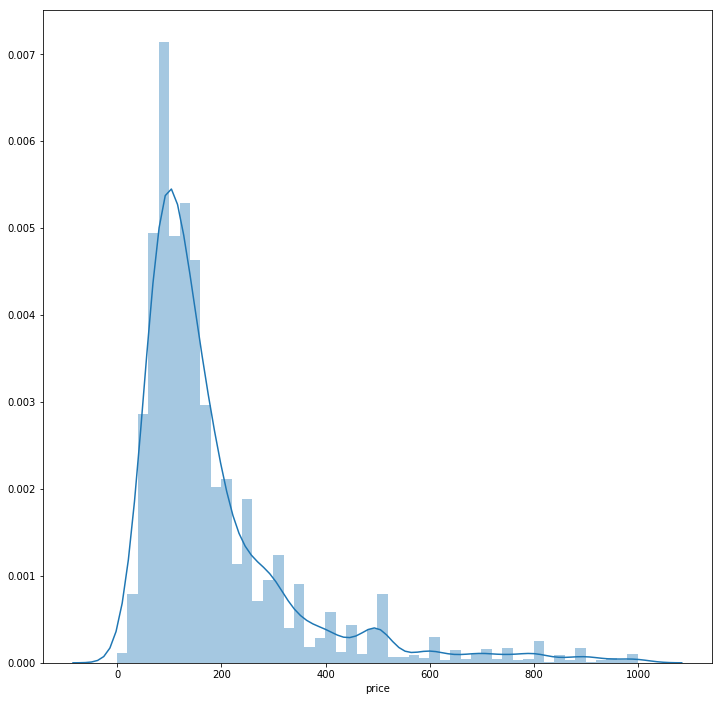

In [35]:
plt.figure(figsize=(12,12))
sns.distplot(price)
plt.show()

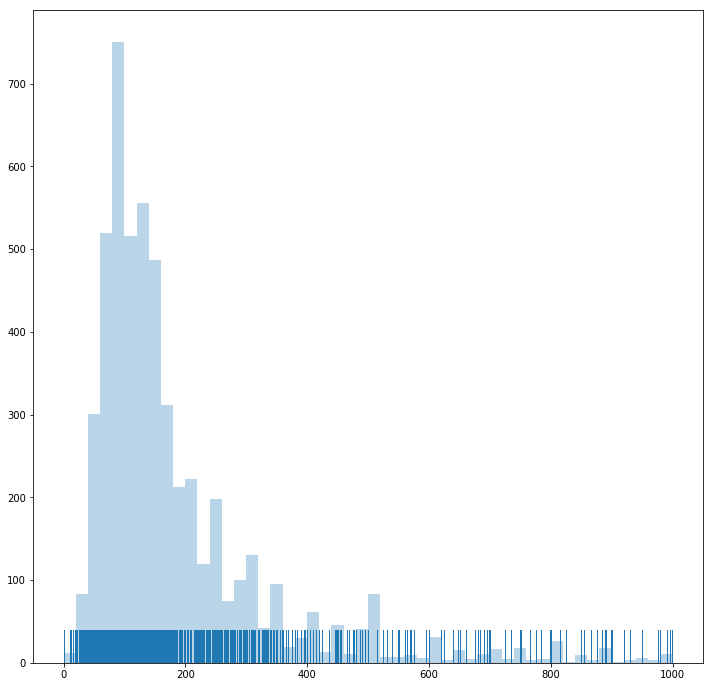

In [73]:
plt.figure(figsize=(12,12))
plt.hist(price, alpha=.3, bins= 50)
sns.rugplot(price)
plt.show()

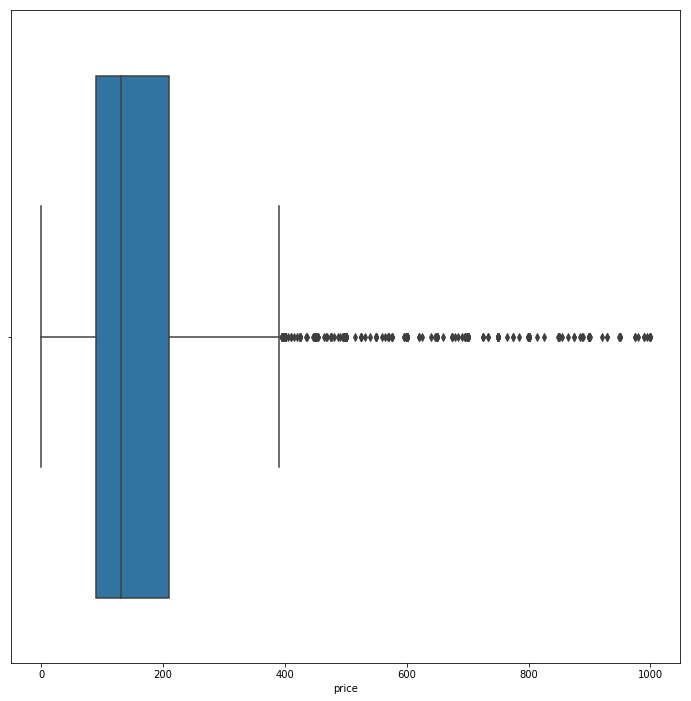

In [37]:
plt.figure(figsize=(12,12))
sns.boxplot(price)
plt.show()

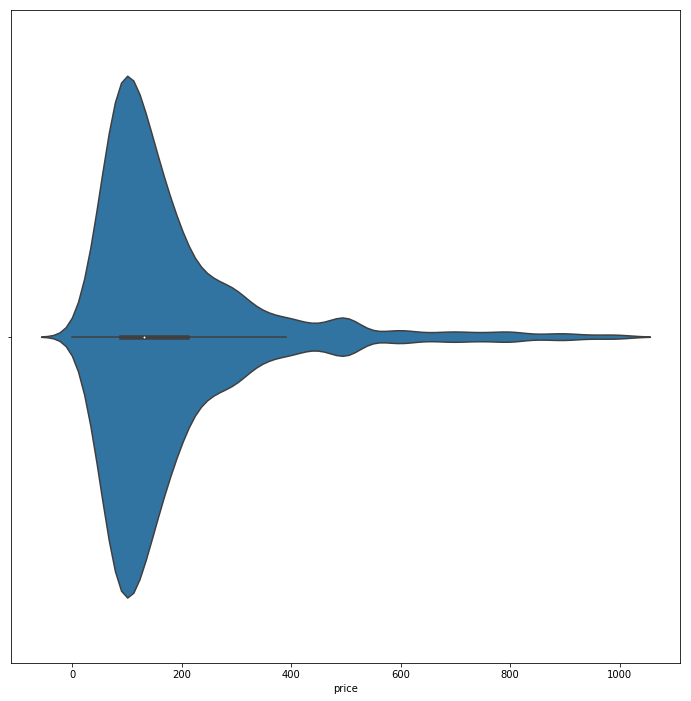

In [38]:
plt.figure(figsize=(12,12))
sns.violinplot(price)
plt.show()

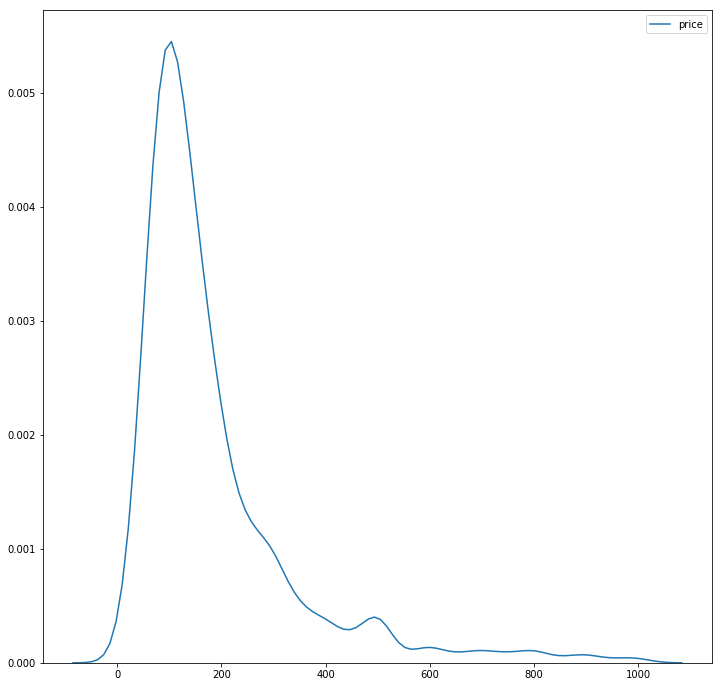

In [39]:
plt.figure(figsize=(12,12))
sns.kdeplot(price)
plt.show()

---

# Two Variables Plotted Four Different Ways

I plotted the longitude vs the latitude.

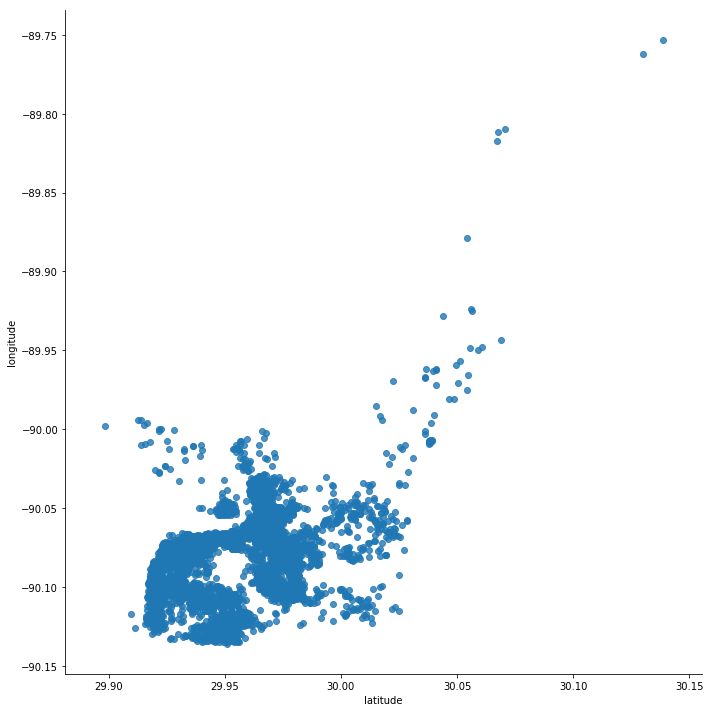

In [16]:
sns.lmplot('latitude', 'longitude', data=listings, fit_reg=False, size=10, aspect=1)
plt.show()

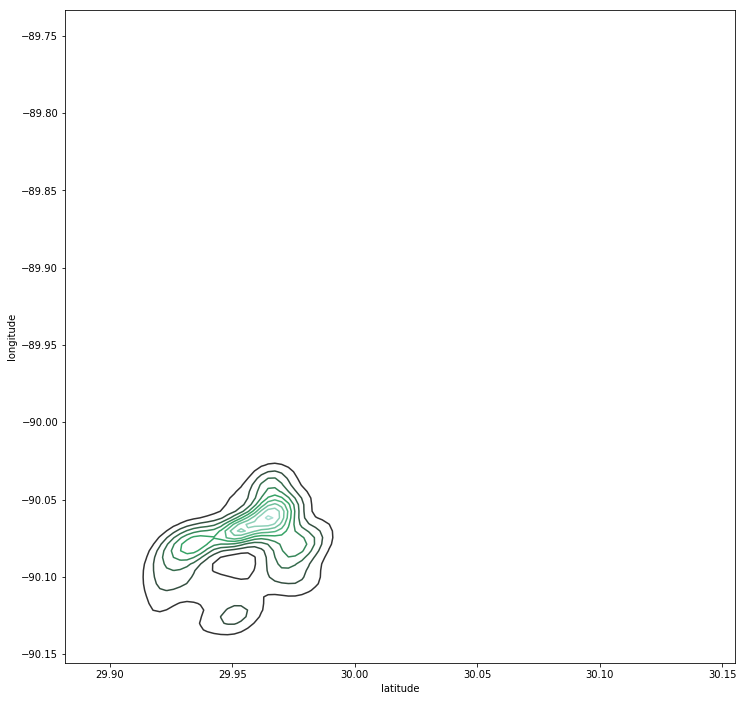

In [17]:
plt.figure(figsize=(12,12))
sns.kdeplot(listings.latitude.dropna(), listings.longitude.dropna())
plt.show()

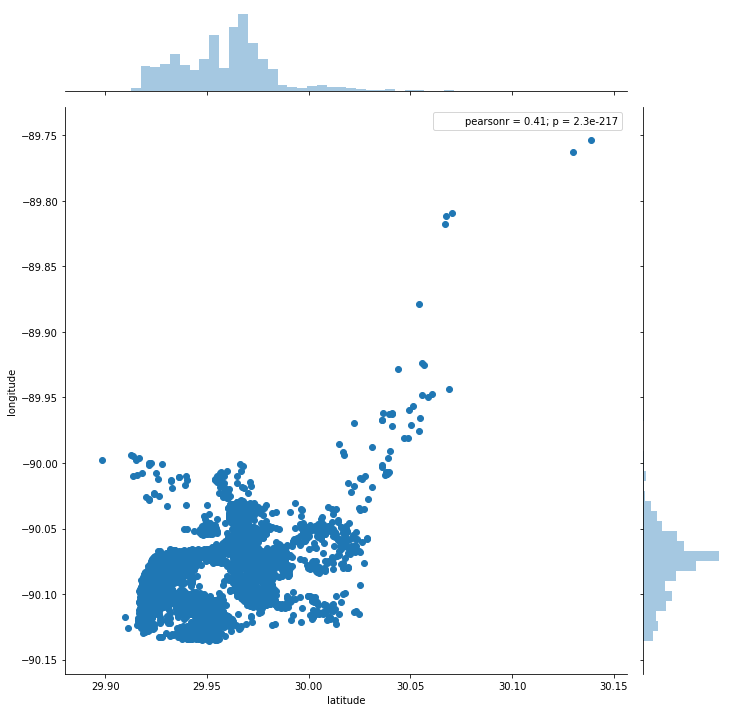

In [18]:
sns.jointplot('latitude', 'longitude', data=listings, size=10, ratio=6)
plt.show()

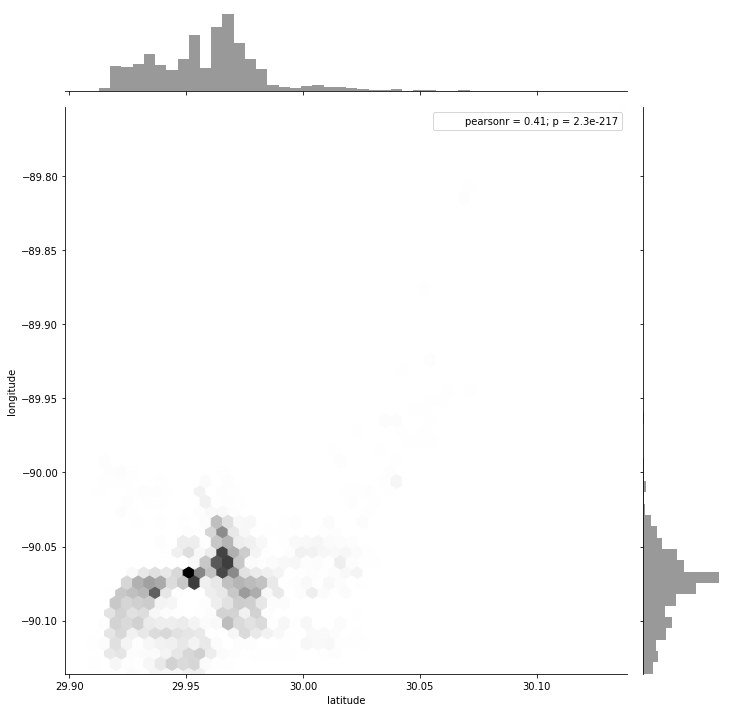

In [19]:
sns.jointplot(x=listings.latitude.dropna(), y=listings.longitude.dropna(), kind="hex", color="k", size=10, ratio=6)
plt.show()

---

# One Continuous Variable and One Categorical Variable
# Plotted Six Different Ways

I did each kind of plot twice. Once neighbourhood vs price. And then again but with month vs price but limited to just the French Quarter. I did this because to do all of the prices for all of the neigbourhoods by month crashed my computer. 

In [67]:
neighbourhoods = pd.read_csv('months_neighbourhoods_price.csv')
neighbourhoods.price = pd.to_numeric(neighbourhoods.price, errors='coerce')/100
popular_neighbourhoods = neighbourhoods.loc[lambda df: neighbourhoods['neighbourhood_cleansed'] == 'French Quarter', :]
popular_neighbourhoods.head()

,id,price,date,month,neighbourhood_cleansed
1099,2670634,179.0,2017-06-02,June,French Quarter
1100,17318038,375.0,2017-06-02,June,French Quarter
1101,12763303,250.0,2017-06-02,June,French Quarter
1102,3775413,350.0,2017-06-02,June,French Quarter
1103,2628876,250.0,2017-06-02,June,French Quarter


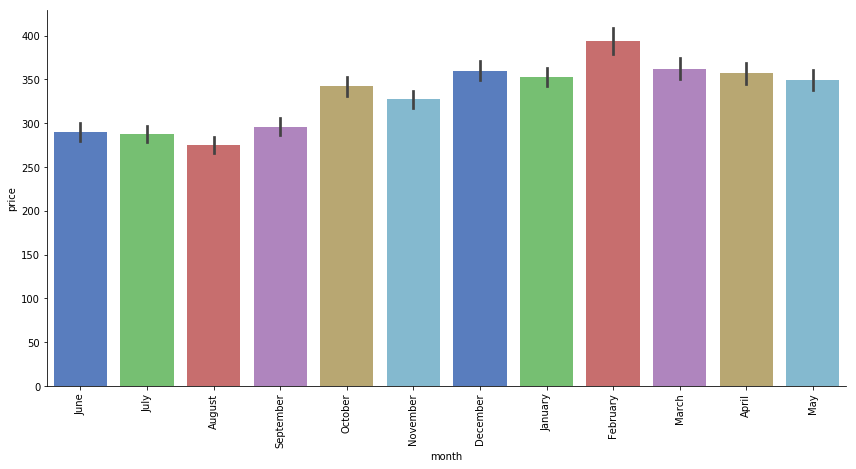

In [26]:
sns.factorplot("month", "price", data=popular_neighbourhoods, kind="bar", size=6, aspect=2, palette="muted", legend=False)
plt.xticks(rotation=90)
plt.show()

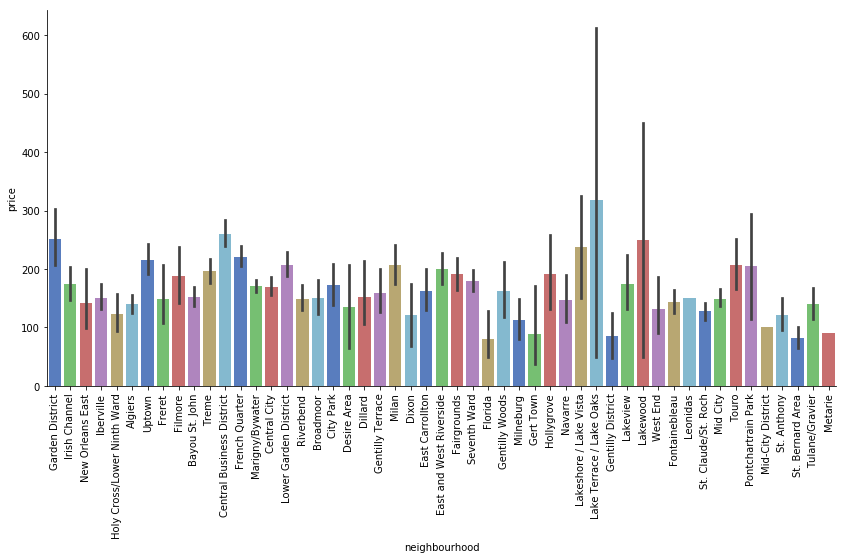

In [20]:
g = sns.factorplot("neighbourhood", "price", data=listings, kind="bar", size=6, aspect=2, palette="muted", legend=False)
plt.xticks(rotation=90)
plt.show()

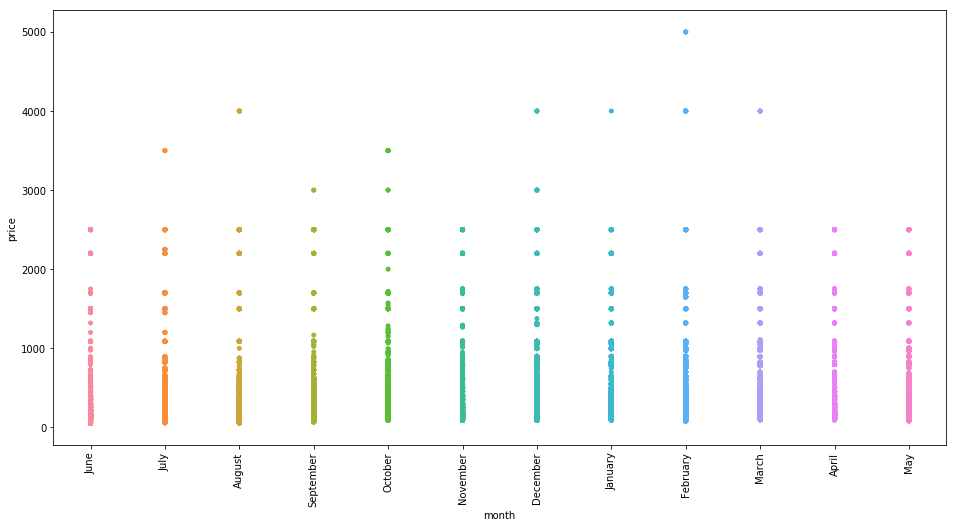

In [27]:
plt.figure(figsize=(16,8))
sns.stripplot(x="month", y="price", data=popular_neighbourhoods)
plt.xticks(rotation=90)
plt.show()

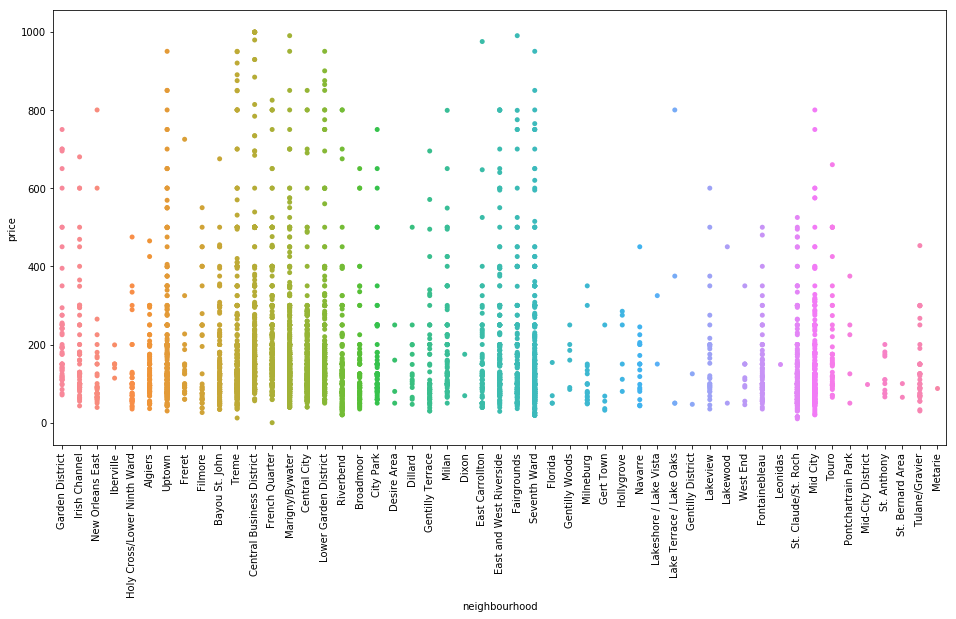

In [21]:
plt.figure(figsize=(16,8))
sns.stripplot(x="neighbourhood", y="price", data=listings)
plt.xticks(rotation=90)
plt.show()

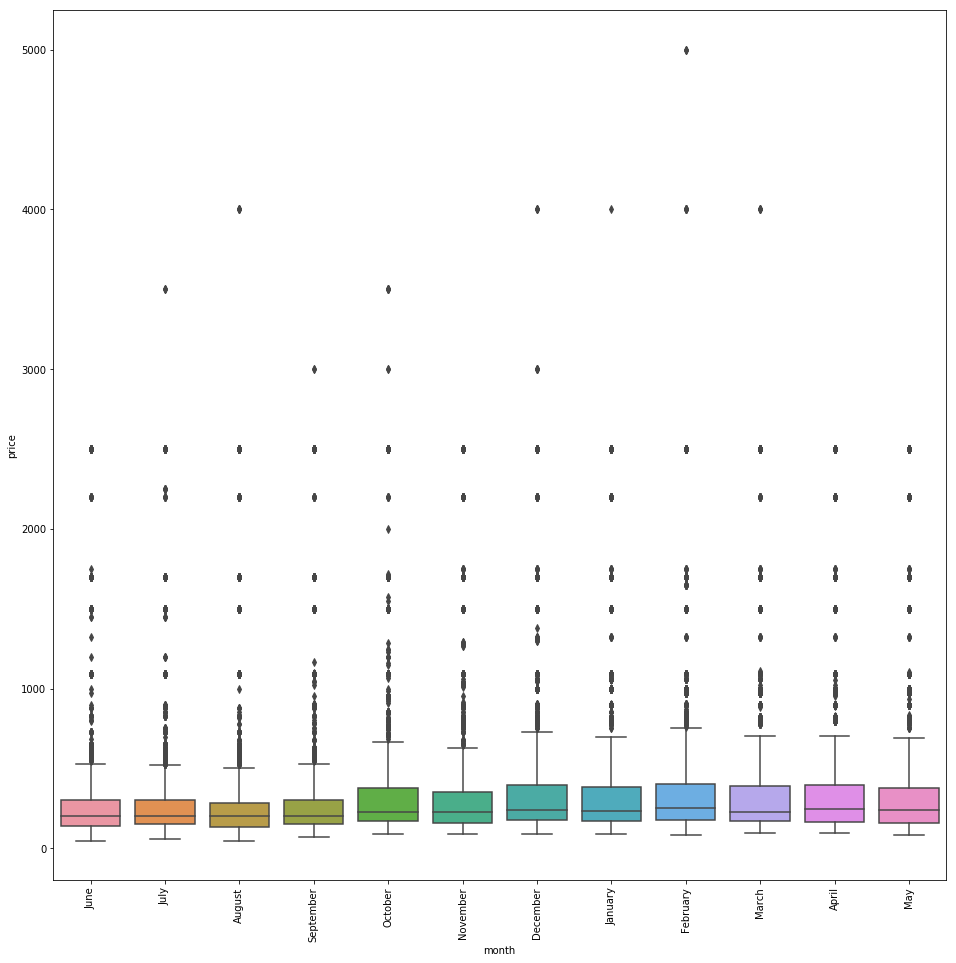

In [28]:
plt.figure(figsize=(16,16))
sns.boxplot(x="month", y="price", data=popular_neighbourhoods)
plt.xticks(rotation=90)
plt.show()

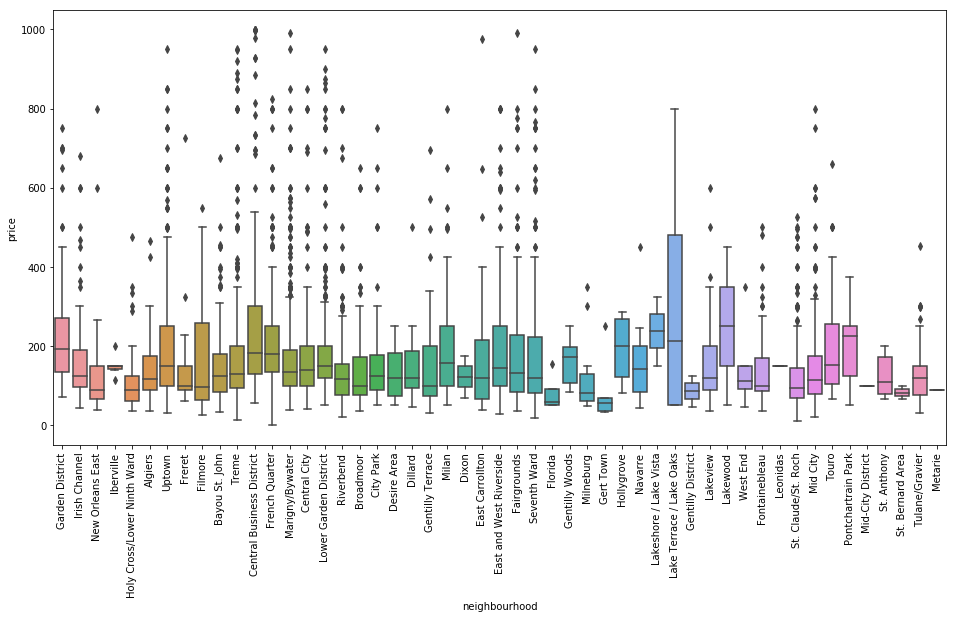

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x="neighbourhood", y="price", data=listings)
plt.xticks(rotation=90)
plt.show()

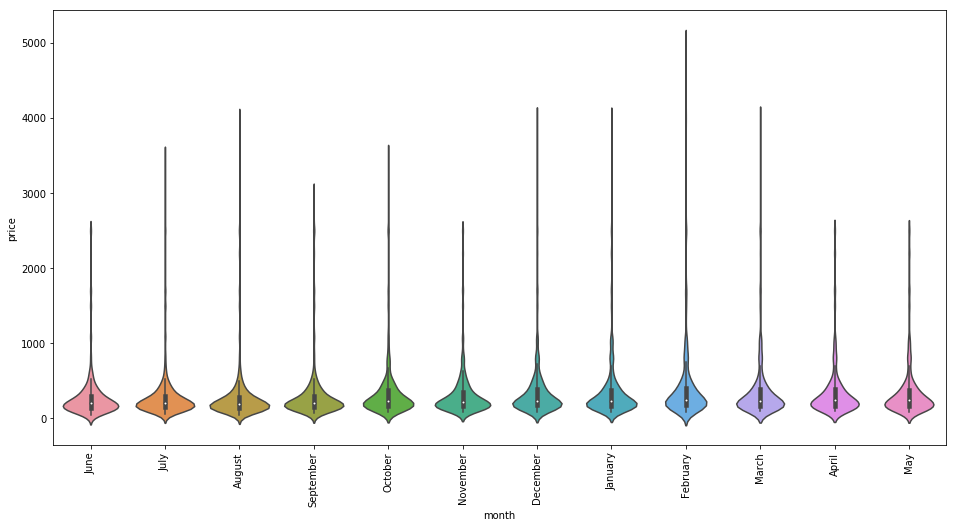

In [29]:
plt.figure(figsize=(16,8))
sns.violinplot(x="month", y="price", data=popular_neighbourhoods)
plt.xticks(rotation = 90)
plt.show()

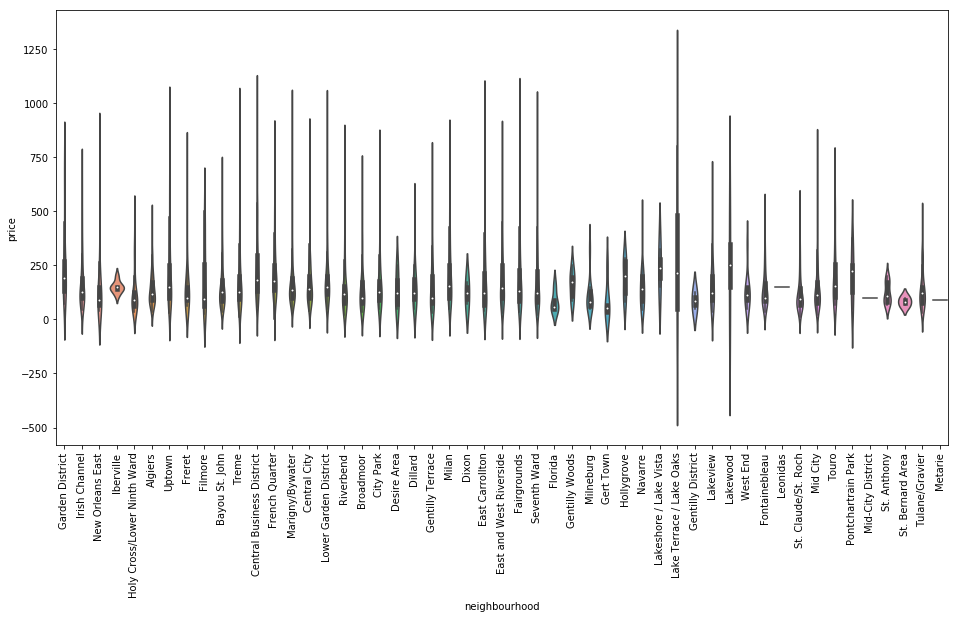

In [23]:
plt.figure(figsize=(16,8))
sns.violinplot(x="neighbourhood", y="price", data=listings)
plt.xticks(rotation = 90)
plt.show()

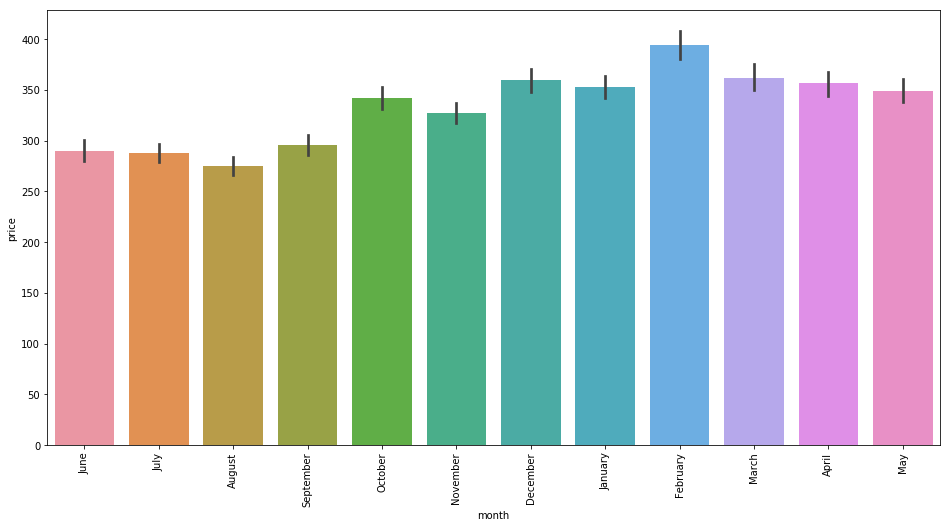

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x="month", y="price", data=popular_neighbourhoods)
plt.xticks(rotation=90)
plt.show()

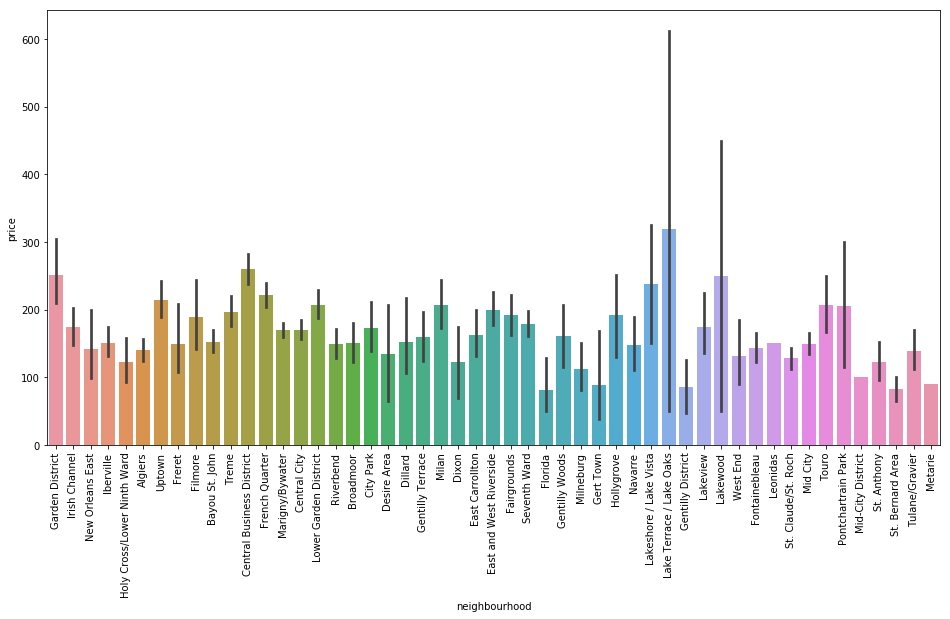

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x="neighbourhood", y="price", data=listings)
plt.xticks(rotation=90)
plt.show()

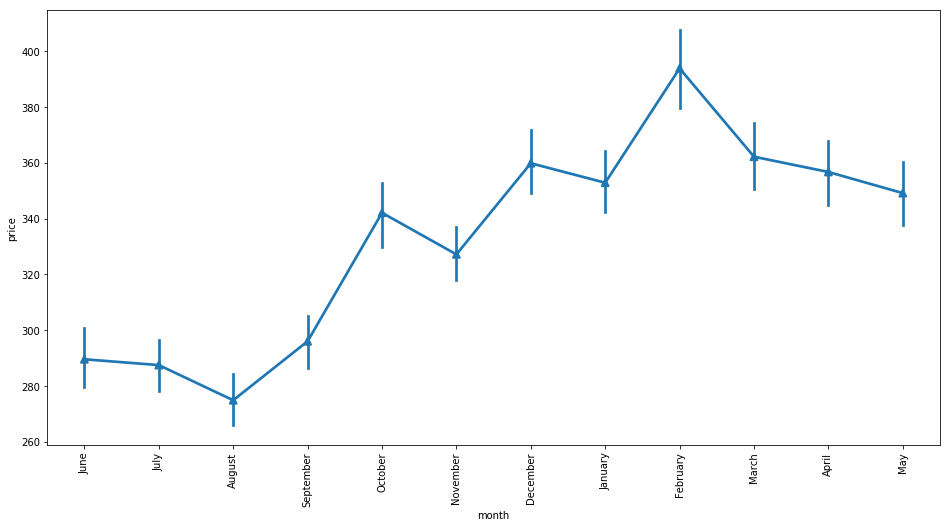

In [31]:
plt.figure(figsize=(16,8))
sns.pointplot(x="month", y="price", data=popular_neighbourhoods,
              markers=["^", "o"], linestyles=["-", "--"])
plt.xticks(rotation=90)
plt.show()

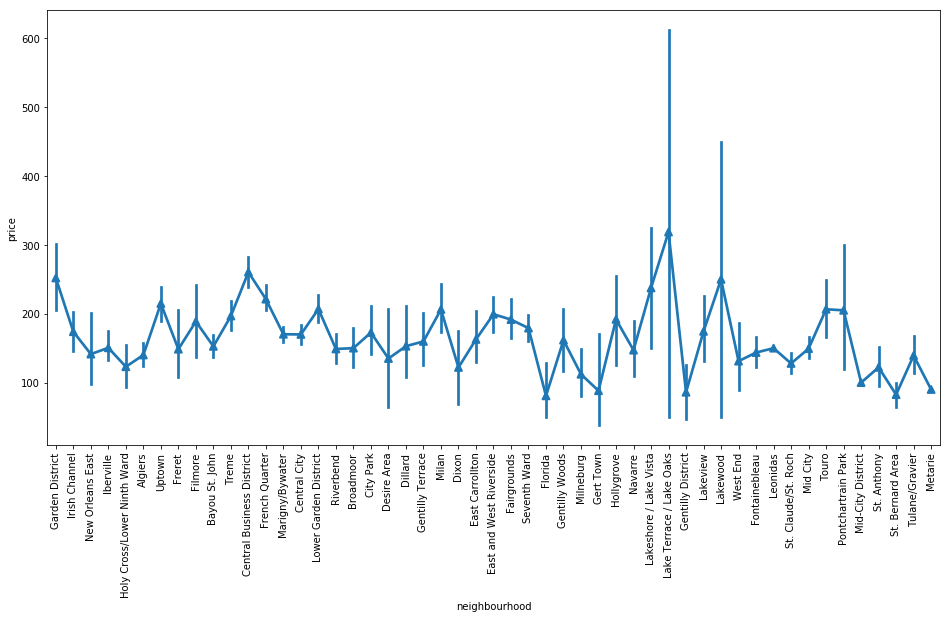

In [25]:
plt.figure(figsize=(16,8))
sns.pointplot(x="neighbourhood", y="price", data=listings,
              markers=["^", "o"], linestyles=["-", "--"])
plt.xticks(rotation=90)
plt.show()

I tried the one below but it just took too long to render. I think the data is too big. Over
47 thousand lines. It worked for the other set of data though. 

In [ ]:
# plt.figure(figsize=(16,8))
# sns.swarmplot(x="month", y="price", data=popular_neighbourhoods)
# plt.xticks(rotation=90)
# plt.show()

Same plot as above but with a different dataset. I think it worked because it was smaller.
About a little under 2,000 rows of data. 

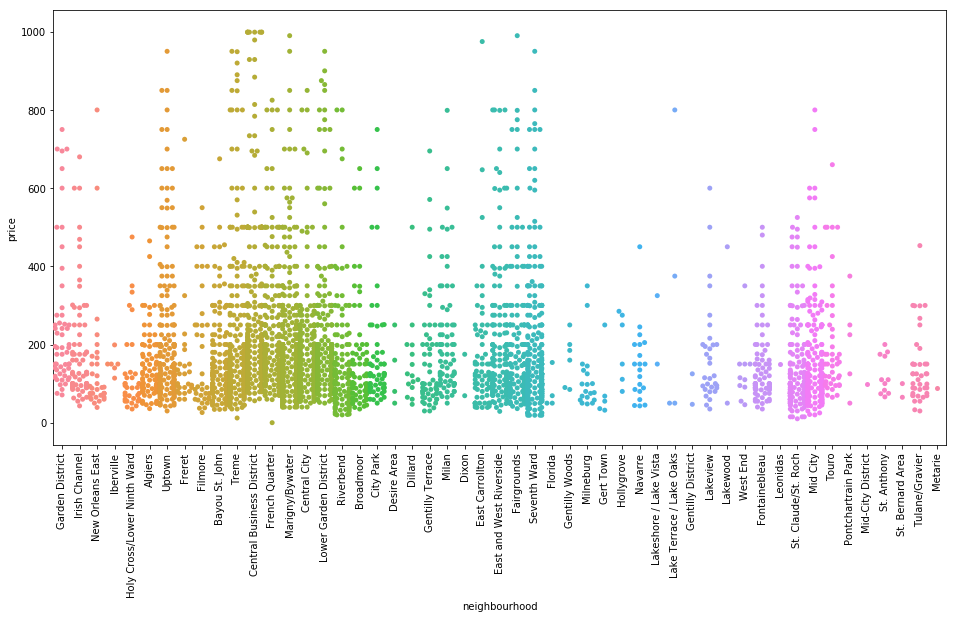

In [34]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="neighbourhood", y="price", data=listings)
plt.xticks(rotation=90)
plt.show()

I tried to get the same effect for the bigger dataset using the "jitter" argument. It was able to run, but I it didn't get the same clustering affect that I was hoping for that I got with the swarmplot.

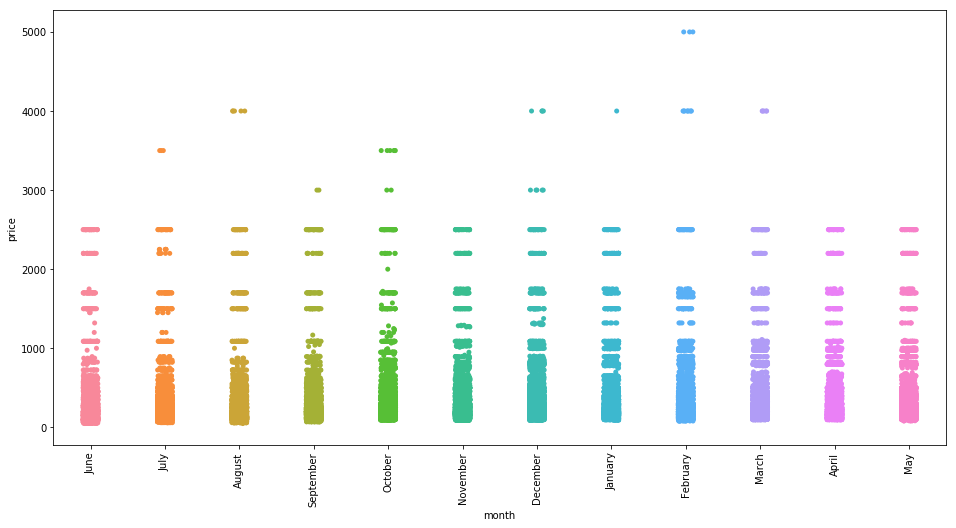

In [40]:
plt.figure(figsize=(16,8))
sns.stripplot(x="month", y="price", data=popular_neighbourhoods, jitter=True)
plt.xticks(rotation=90)
plt.show()

---

# One Continuous Variable and Two Categorical Variables

In [48]:
two_neighbourhoods = neighbourhoods.loc[(neighbourhoods.neighbourhood_cleansed == 'French Quarter') | (neighbourhoods.neighbourhood_cleansed == 'Central Business District') , :]

In [69]:
two_neighbourhoods.head()

,id,price,date,month,neighbourhood_cleansed
162,10600555,499.0,2017-06-02,June,Central Business District
163,4363671,225.0,2017-06-02,June,Central Business District
165,10898737,185.0,2017-06-02,June,Central Business District
166,13798389,245.0,2017-06-02,June,Central Business District
167,13814106,300.0,2017-06-02,June,Central Business District


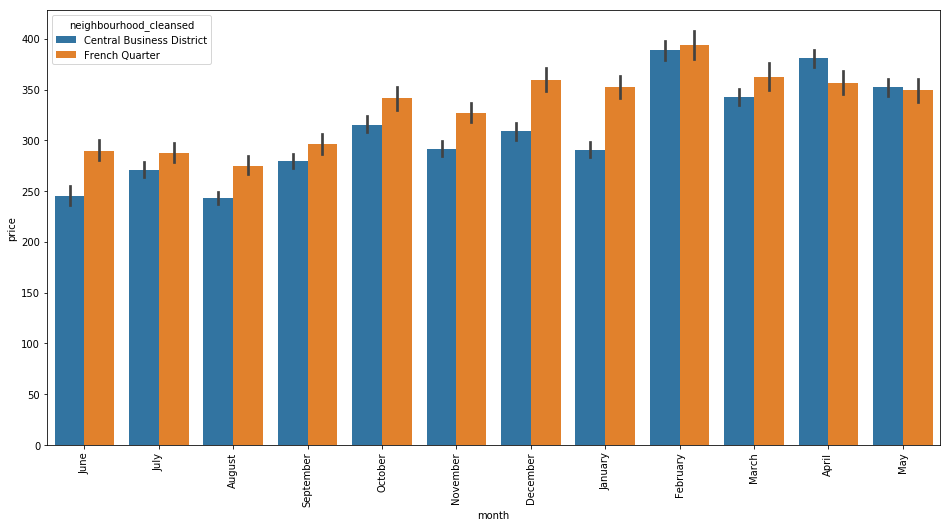

In [51]:
plt.figure(figsize=(16,8))
sns.barplot(x="month", y="price", hue="neighbourhood_cleansed", data=two_neighbourhoods)
plt.xticks(rotation=90)
plt.show()

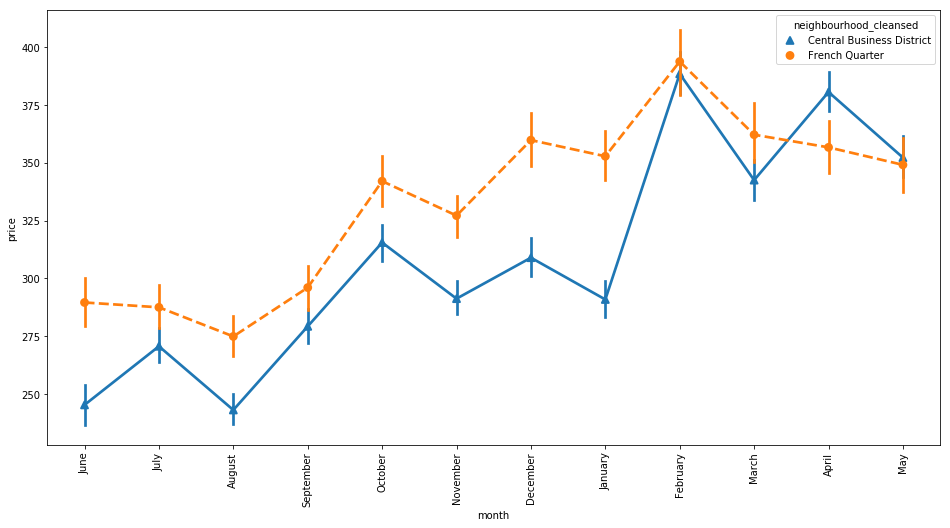

In [52]:
plt.figure(figsize=(16,8))
sns.pointplot(x="month", y="price", hue="neighbourhood_cleansed", data=two_neighbourhoods,
              markers=["^", "o"], linestyles=["-", "--"])
plt.xticks(rotation=90)
plt.show()

---

# Random Plotting and Challenge Attempt

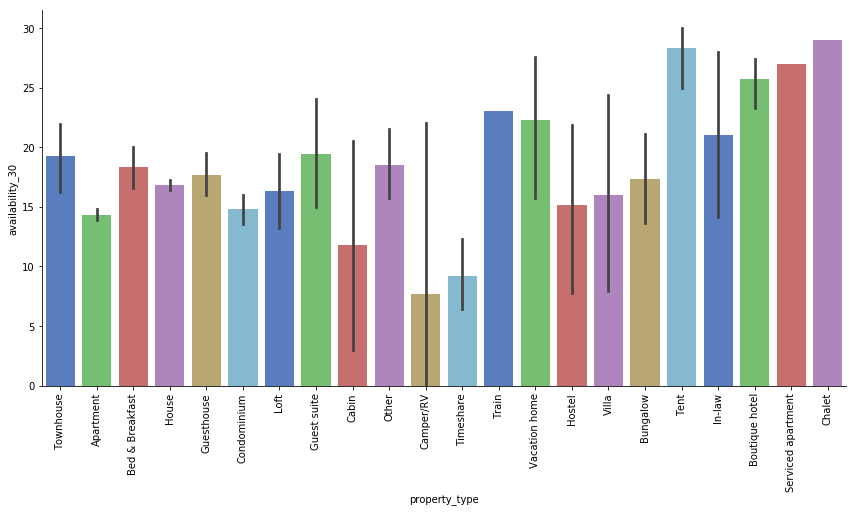

In [54]:
sns.factorplot("property_type", "availability_30", data=listings, kind="bar", size=6, aspect=2, palette="muted", legend=False)
plt.xticks(rotation=90)
plt.show()

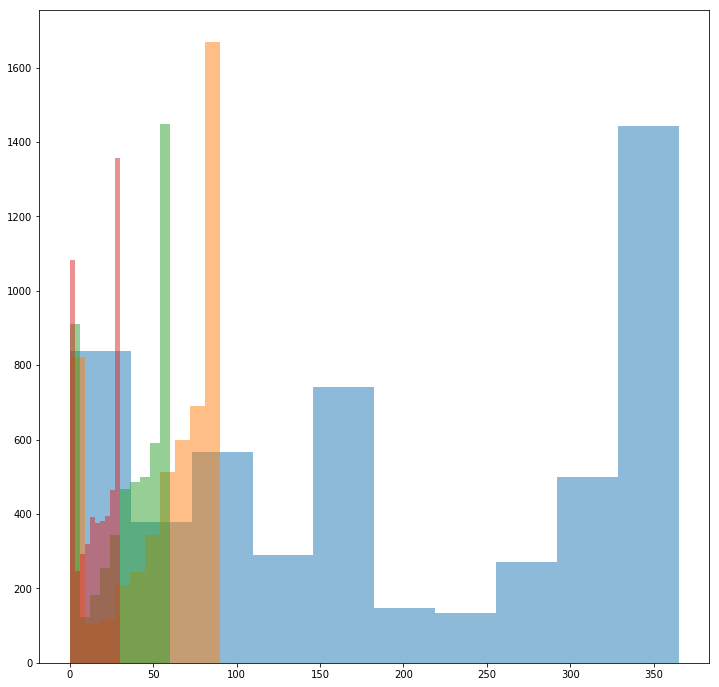

In [62]:
plt.figure(figsize=(12,12))
plt.hist(listings.availability_365, alpha=0.5)
plt.hist(listings.availability_90, alpha=0.5)
plt.hist(listings.availability_60, alpha=0.5)
plt.hist(listings.availability_30, alpha=0.5)
plt.show()

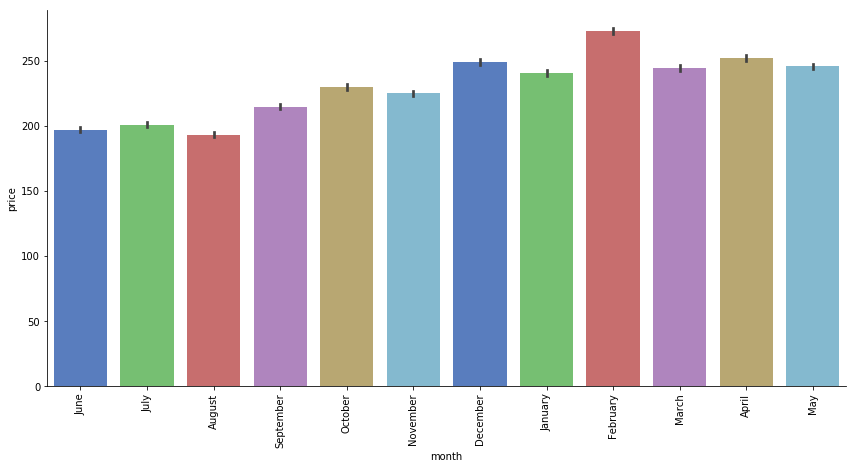

In [74]:
sns.factorplot("month", "price", data=neighbourhoods, kind="bar", size=6, aspect=2, palette="muted", legend=False)
plt.xticks(rotation=90)
plt.show()